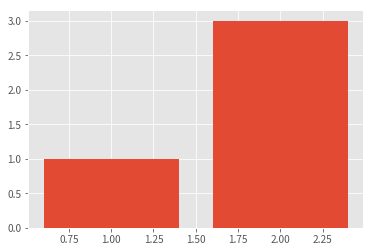

In [2]:
#막대 그래프

import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y = [1,3]

ax.bar(x,y)

plt.show()

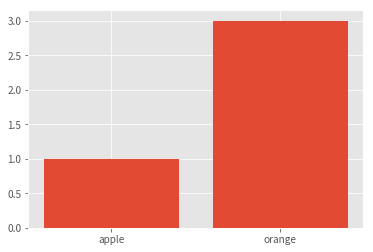

In [3]:
#눈금 레이블 부여

fig = plt.figure()
ax = fig.add_subplot(111)

labels =['apple', 'orange']
ax.bar(x,y, tick_label=labels)

plt.show()

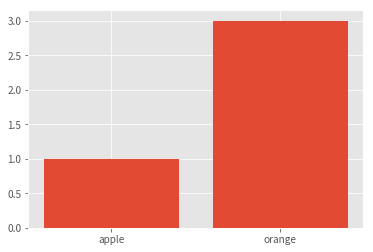

In [5]:
#이미 그린 후에 눈금 부여한다면
#표는 그려준 뒤에
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x,y)

#x축눈금과 레이블
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

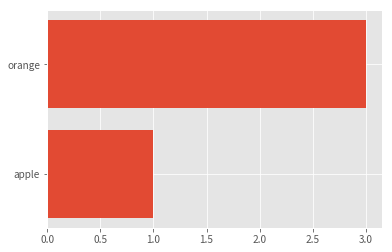

In [6]:
#수평 막대그래프

fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(x,y, tick_label=labels)

plt.show()

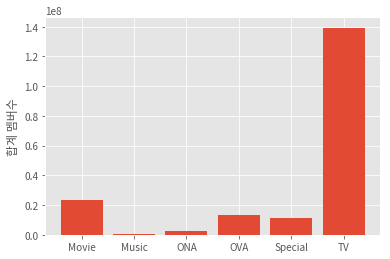

In [7]:
#실제 csv로 막대그래프 생성

import os
import pandas as pd
anime_master_csv = './anime/anime_master.csv'

dfac = pd.read_csv(anime_master_csv)
dfac.head()

fig = plt.figure()
ax = fig.add_subplot(111)

y = dfac.groupby('type').sum()['members'] #리스트에 대한 합계를 배급 종별마다
x = range(len(y)) #데이터 수를 셈

xlabels = y.index #Series의 Index 부여
ax.bar(x,y,tick_label=xlabels)
ax.set_ylabel('합계 멤버수')

plt.show()

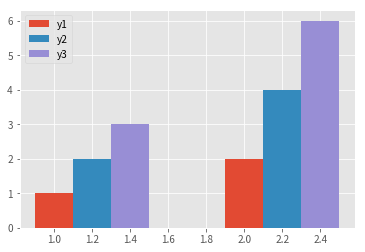

In [9]:
#여러가지 그룹에 대한 막대그래프. 안겹치게 해야한다.
 #그냥 bar를 여러개 그리면 안됨
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x = [1,2]
y1, y2, y3 = [1,2], [2,4], [3,6]

w = 0.2 #막대그래프의 가로폭 w을 비켜서 그리기.
ax.bar(x, y1, width=w, label = 'y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w*2, y3, width=w, label='y3')

ax.legend()

plt.show()

In [16]:

anime_genre_top10_pivoted_csv = './anime/anime_genre_top10_pivoted.csv'
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')

dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


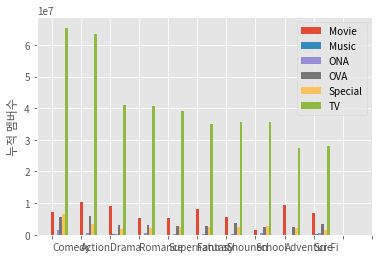

In [17]:
#배급 종별/장르별 막대그래프 그리기

fig = plt.figure()
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt,dfag[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('누적 멤버수')
ax.legend()

plt.show()

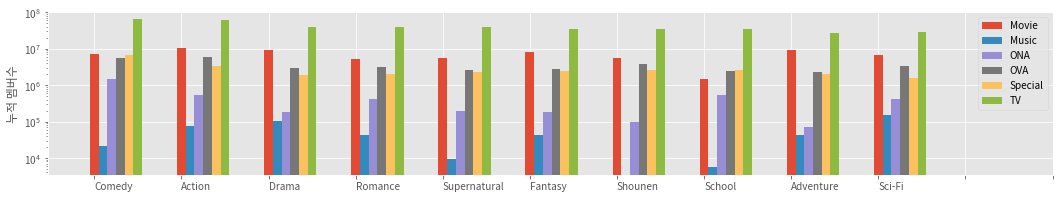

In [18]:
#가독성이 떨어져서 로그축 이용하기


fig = plt.figure(figsize = (18,3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt,dfag[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('누적 멤버수')
ax.set_yscale('log')
ax.legend()

plt.show()

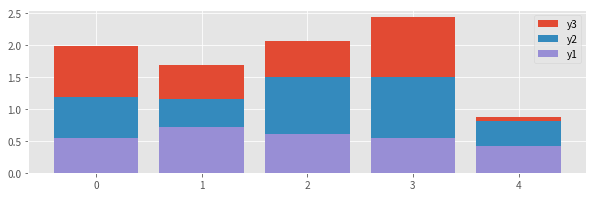

In [19]:
#누적 막대그래프

#사실 누적 막대그래프는, 겹쳐서 그리는 것임. 수동으로 값 합계를 내서 많은 쪽부터 배경으로 먼저 그리는 것

#3개 이상을 누적할 때 쓰임

x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))
y1, y2, y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

#누적 막대 그래프 그리기
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

ax.legend()
plt.show()

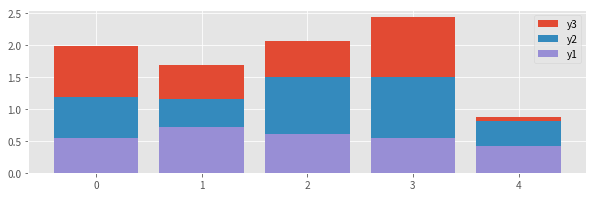

In [20]:
# bottom 옵션으로 누적 설정 (두개 그룹까지 가능)

figure = plt.figure(figsize=(10,3))
ax = figure.add_subplot(111)

ax.bar(x,y3, bottom=y2b, label='y3')
ax.bar(x,y2, bottom=y1, label='y2')
ax.bar(x,y1, label='y1')
ax.legend()

plt.show()

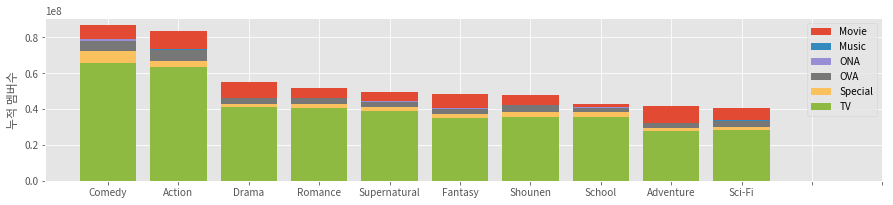

In [22]:
#누적 막대 활용 : 배급 종별/장르별 누적 막대그래프

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    #i열부터 마지막까지 합 계산 -> y값에 넣어준다
    y = dfag.iloc[:, i: cols].sum(axis=1)
    
    ax.bar(x,y,label=t)
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('누적 멤버수')
ax.legend()

plt.show()